# Problem Statement:

## Create a machine learning model which will help the company in determining the salary of newly hired employees using the given data.


1. Your views about the problem statement?  

The problem statement is to create a machine learning model for predicting the salary of newly hired employees at TechWorks Consulting. This involves preprocessing the data, converting categorical features, handling missing values and outliers, and selecting a regression model. The goal is to provide accurate salary predictions based on various factors such as college, city, role, previous CTC, previous job change, graduation marks	and experience.

2. What will be your approach to solving this task?

To solve this, I would first gather data,  preprocess it, train different machine learning regression algorithms and evaluate thier performances and then select the best one for predictions. I will also do visualisations where I will use tools like matplotlib, seaborn, or other data visualization libraries. I'd create plots and charts to explore the data distribution, relationships between variables, and patterns. Visualizations could include histograms, scatter plots, line charts, or heatmaps, depending on the nature of the data and the insights sought. Visual representations often aid in understanding complex patterns, identifying outliers, and communicating findings effectively.

3. What were the available ML model options you had to perform this task?

As the Target variable (CTC) is a continuous variable and we have to predict it. So, I am going to use Regression models. The models I am selecting for the task are -

Linear Regression: Simple and interpretable, assumes a linear relationship between features and target variable.

Ridge Regression: Handles multicollinearity by adding a regularization term to the cost function, preventing overfitting.

Lasso Regression: Similar to Ridge but has a tendency to perform feature selection by driving some coefficients to exactly zero.

Decision Tree Regression: Non-linear model that can capture complex relationships in the data, may prone to overfitting.

Random Forest: Ensemble method combining multiple decision trees to improve predictive performance and reduce overfitting.

In [1]:
# Importing libraries for Data manipulation and analysis
import pandas as pd  # For handling data frames
import numpy as np   # For numerical operations

In [2]:
# Reading the CSV files
df=pd.read_csv("ML case Study.csv")
college = pd.read_csv('Colleges.csv')
city = pd.read_csv('cities.csv')

In [3]:
# Taking a look at the files
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09


As we can see that there are 1589 rows and 8 columns, out of which CTC is the target varaible which we have to predict

In [4]:
college

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus
5,IIT Roorkee,IIIT Lucknow,"KIIT, Bhubaneswar"
6,IIT Guwahati,MNNIT Allahabad,Amity University
7,IIIT Hyderabad,Punjab Engineering College,"BMS College, Bangalore"
8,BITS Pilani (Pilani Campus),DAIICT,"PES University, Bangalore"
9,IIT Indore,MNIT Jaipur,"USIT, Delhi"


We have to make columns in dataframe df for grouping college column into Tier 1, Tier 2 and Tier 3 giving more weighest to Tier 1, then Tier 2 and Tier 3 as college column is not a numerical column.

# Data Preprocessing

In [5]:
# Covertig into list so that we can replace the values of college column with Tier1, TIer2 and Tier3
Tier1 = college['Tier 1'].tolist()
Tier2 = college['Tier 2'].tolist()
Tier3 = college['Tier 3'].tolist()

In [6]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

We will remove the nan values from Tier 1, Tier 2 and Tier 3

### Remove NaN values using list comprehension

In [7]:
Tier1_cleaned = [institution for institution in Tier1 if pd.notna(institution)]
Tier1_cleaned

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad']

In [8]:
Tier2_cleaned = [institution for institution in Tier2 if pd.notna(institution)]
Tier2_cleaned

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [9]:
Tier3_cleaned = [institution for institution in Tier3 if pd.notna(institution)]
Tier3_cleaned

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune']

### Coverting college values into numbers

In [10]:
for item in df.College:
    if item in Tier1_cleaned:
        df["College"].replace(item, 1, inplace=True)
    elif item in Tier2_cleaned:
        df["College"].replace(item, 2, inplace=True)
    elif item in Tier3_cleaned:
        df["College"].replace(item, 3, inplace=True)

In [11]:
# Checking the changes
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,1,Surat,Executive,61285.0,3,44,60,77283.59
1585,1,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86
1586,1,Ahmedabad,Executive,44907.0,1,60,19,70186.19
1587,1,Durgapur,Executive,52054.0,2,67,29,73394.09


We cen see that college column is coverted into numerical values

In [12]:
#Conveting city dataframe columnn values into list to categorise them
Metro_City = city['Metrio City'].tolist()
Non_Metro_City = city['non-metro cities'].tolist()

In [13]:
for item in df.City:
    if item in Metro_City:
        df["City"].replace(item, 'Metro', inplace=True)
    elif item in Non_Metro_City:
        df["City"].replace(item, 'Non_Metro', inplace=True)

In [14]:
# Checking distinct values for Role column as we have to convert them to numbers later
distinct_values = 

print(distinct_values)

['Manager' 'Executive']


In [15]:
df

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Non_Metro,Manager,55523.0,3,66,19,71406.58
1,2,Non_Metro,Executive,57081.0,1,84,18,68005.87
2,3,Non_Metro,Executive,60347.0,2,52,28,76764.02
3,3,Non_Metro,Executive,49010.0,2,81,33,82092.39
4,1,Non_Metro,Executive,57879.0,4,74,32,73878.10
...,...,...,...,...,...,...,...,...
1584,1,Metro,Executive,61285.0,3,44,60,77283.59
1585,1,Non_Metro,Executive,63140.0,1,44,24,68416.86
1586,1,Metro,Executive,44907.0,1,60,19,70186.19
1587,1,Non_Metro,Executive,52054.0,2,67,29,73394.09


In [16]:
# Checking data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 99.4+ KB


In [17]:
# Checking missing values
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

There are no missing values and the columns city and role are strings, so we have to convert it to numbers

In [18]:
# Convering them using dummy variable
df1 = pd.get_dummies(df, columns=['City', 'Role'],drop_first=True)

In [19]:
# Checking the changes
df1

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_Non_Metro,Role_Manager
0,2,55523.0,3,66,19,71406.58,1,1
1,2,57081.0,1,84,18,68005.87,1,0
2,3,60347.0,2,52,28,76764.02,1,0
3,3,49010.0,2,81,33,82092.39,1,0
4,1,57879.0,4,74,32,73878.10,1,0
...,...,...,...,...,...,...,...,...
1584,1,61285.0,3,44,60,77283.59,0,0
1585,1,63140.0,1,44,24,68416.86,1,0
1586,1,44907.0,1,60,19,70186.19,0,0
1587,1,52054.0,2,67,29,73394.09,1,0


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   Previous CTC         1589 non-null   float64
 2   Previous job change  1589 non-null   int64  
 3   Graduation Marks     1589 non-null   int64  
 4   EXP (Month)          1589 non-null   int64  
 5   CTC                  1589 non-null   float64
 6   City_Non_Metro       1589 non-null   uint8  
 7   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(4), uint8(2)
memory usage: 77.7 KB


In [21]:
# Let's see how the data look mathematically
df1.describe()

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_Non_Metro,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.485840,0.206419
std,0.838330,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957,0.404862
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000
25%,1.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000
50%,2.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000,0.000000
75%,3.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,0.000000
max,3.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000


In [22]:
# Checking for duplicate values
df1.duplicated().sum()

46

In [23]:
# Drop them
df2=df1.drop_duplicates()

In [24]:
df2.duplicated().sum()

0

In [25]:
# Let's see the correlations among columns
df2.corr()

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_Non_Metro,Role_Manager
College,1.000000,0.041470,-0.059729,0.004344,0.009064,-0.026282,0.014132,-0.012903
Previous CTC,0.041470,1.000000,0.010004,-0.027740,0.121437,0.262554,-0.000010,0.016814
Previous job change,-0.059729,0.010004,1.000000,0.020345,0.022416,0.005110,-0.058553,-0.025111
Graduation Marks,0.004344,-0.027740,0.020345,1.000000,-0.054128,-0.004035,0.014316,0.021289
EXP (Month),0.009064,0.121437,0.022416,-0.054128,1.000000,0.295916,0.020581,-0.026618
CTC,-0.026282,0.262554,0.005110,-0.004035,0.295916,1.000000,0.013014,0.623223
City_Non_Metro,0.014132,-0.000010,-0.058553,0.014316,0.020581,0.013014,1.000000,0.043584
Role_Manager,-0.012903,0.016814,-0.025111,0.021289,-0.026618,0.623223,0.043584,1.000000


In [26]:
df2

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_Non_Metro,Role_Manager
0,2,55523.0,3,66,19,71406.58,1,1
1,2,57081.0,1,84,18,68005.87,1,0
2,3,60347.0,2,52,28,76764.02,1,0
3,3,49010.0,2,81,33,82092.39,1,0
4,1,57879.0,4,74,32,73878.10,1,0
...,...,...,...,...,...,...,...,...
1584,1,61285.0,3,44,60,77283.59,0,0
1585,1,63140.0,1,44,24,68416.86,1,0
1586,1,44907.0,1,60,19,70186.19,0,0
1587,1,52054.0,2,67,29,73394.09,1,0


### Checking for outliers


In [27]:
# Visualization
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns            # For advanced statistical visualizations

C:\Users\91700\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Previous CTC'>

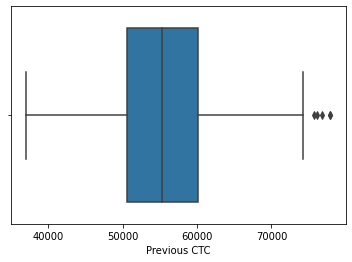

In [28]:
sns.boxplot(df2['Previous CTC'])

Here we can see ouliers, but we will not remove them because it is possible to have have high ctc values

C:\Users\91700\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Graduation Marks'>

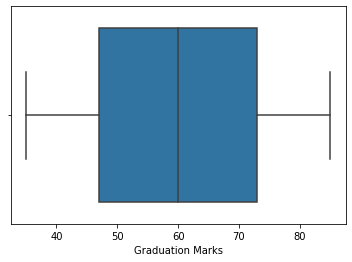

In [29]:
sns.boxplot(df2['Graduation Marks'])

C:\Users\91700\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='CTC'>

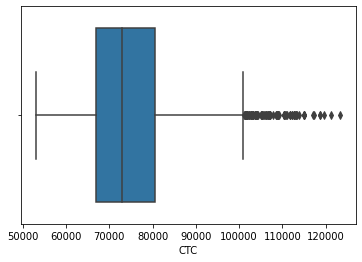

In [30]:
sns.boxplot(df2['CTC'])

Same here also, we will not remove them because it is possible to have have high ctc values

# Univariate analysis

C:\Users\91700\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='College', ylabel='count'>

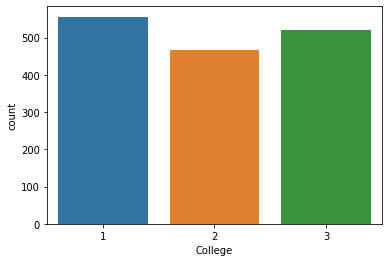

In [31]:
sns.countplot(df2["College"])

We can see that there are more number of Tier1 colleges and Tier3 colleges 

C:\Users\91700\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='City', ylabel='count'>

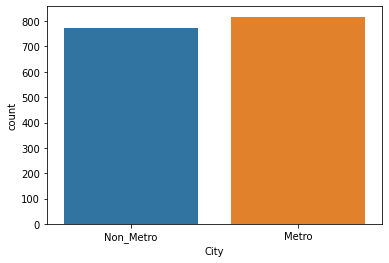

In [32]:
sns.countplot(df["City"])

More number of metro cities than non_metro cities

# Bivariate analysis

C:\Users\91700\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Previous CTC', ylabel='CTC'>

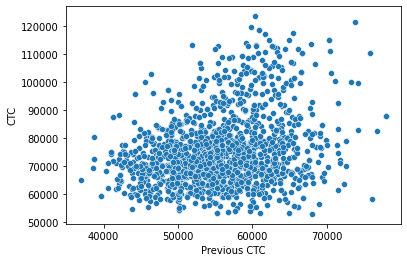

In [33]:
sns.scatterplot(df2['Previous CTC'],df['CTC'])

Here we can see as Previous CTC increases, the Target variable also increase

# X-y split

In [34]:
# Our dataset is ready for splitting now
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler     # For standardizing numerical features

In [35]:
X=df2.drop('CTC',axis=1)

In [36]:
X

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),City_Non_Metro,Role_Manager
0,2,55523.0,3,66,19,1,1
1,2,57081.0,1,84,18,1,0
2,3,60347.0,2,52,28,1,0
3,3,49010.0,2,81,33,1,0
4,1,57879.0,4,74,32,1,0
...,...,...,...,...,...,...,...
1584,1,61285.0,3,44,60,0,0
1585,1,63140.0,1,44,24,1,0
1586,1,44907.0,1,60,19,0,0
1587,1,52054.0,2,67,29,1,0


In [37]:
y=df2['CTC']

In [38]:
y

0       71406.58
1       68005.87
2       76764.02
3       82092.39
4       73878.10
          ...   
1584    77283.59
1585    68416.86
1586    70186.19
1587    73394.09
1588    70056.31
Name: CTC, Length: 1543, dtype: float64

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Normalize 'Previous CTC' columns using StandardScaler
scaler = StandardScaler()

# Fit and transform and Reshape the data to a 2D array
X_train['Previous CTC'] = scaler.fit_transform(X_train['Previous CTC'].values.reshape(-1, 1))
X_test['Previous CTC'] = scaler.transform(X_test['Previous CTC'].values.reshape(-1, 1))


<ipython-input-40-cd421781d137>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Previous CTC'] = scaler.fit_transform(X_train['Previous CTC'].values.reshape(-1, 1))
<ipython-input-40-cd421781d137>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Previous CTC'] = scaler.transform(X_test['Previous CTC'].values.reshape(-1, 1))


In [41]:
X_train

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),City_Non_Metro,Role_Manager
490,2,0.915275,3,52,19,0,0
1565,1,1.642675,1,47,58,0,0
1187,3,-0.133640,2,52,62,1,0
967,3,-1.027222,2,72,44,1,0
1057,2,-0.229462,2,45,45,0,0
...,...,...,...,...,...,...,...
1130,3,-0.652674,1,58,39,0,0
1294,1,-0.371537,3,83,58,0,0
860,1,3.054989,4,63,37,0,1
1491,2,-0.870080,1,76,42,1,1


In [42]:
X_test

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),City_Non_Metro,Role_Manager
1534,2,1.017575,3,43,39,0,0
1156,1,1.457812,4,82,19,0,1
1253,1,0.199023,4,74,40,1,0
561,3,0.975690,1,55,54,0,0
1098,2,0.368670,2,55,52,1,0
...,...,...,...,...,...,...,...
1321,3,-0.054693,4,38,62,1,1
754,1,-0.051228,3,82,24,0,0
1244,1,0.855010,4,67,18,1,0
1090,1,0.756024,2,51,47,0,1


# Training Models

In [43]:
# Models for regression
from sklearn.linear_model import LinearRegression     # Linear Regression model
from sklearn.linear_model import Ridge                # Ridge Regression model
from sklearn.linear_model import Lasso                # Lasso Regression model
from sklearn.tree import DecisionTreeRegressor         # Decision Tree Regression model
from sklearn.ensemble import RandomForestRegressor     # Random Forest Regression model

linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

In [44]:
# Fit models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
# Get the intercept
intercept = linear_model.intercept_

print("Intercept:", intercept)

Intercept: 63304.8306205812


In [45]:
# Evaluate Model Performance
linear_pred = linear_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

In [46]:
# Model evaluation metrics
from sklearn.metrics import mean_absolute_error        # MAE
from sklearn.metrics import mean_squared_error         # MSE
from sklearn.metrics import r2_score                  # R-squared

# Calculate MAE, MSE, RMSE, R-squared for each model

In [47]:
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_pred)

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)

tree_mae = mean_absolute_error(y_test, tree_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, tree_pred)

forest_mae = mean_absolute_error(y_test, forest_pred)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, forest_pred)

# Print the metrics
print("Linear Regression:")
print(f"MAE: {linear_mae}, MSE: {linear_mse}, RMSE: {linear_rmse}, R-squared: {linear_r2}")

print("\nRidge Regression:")
print(f"MAE: {ridge_mae}, MSE: {ridge_mse}, RMSE: {ridge_rmse}, R-squared: {ridge_r2}")

print("\nLasso Regression:")
print(f"MAE: {lasso_mae}, MSE: {lasso_mse}, RMSE: {lasso_rmse}, R-squared: {lasso_r2}")

print("\nDecision Tree Regression:")
print(f"MAE: {tree_mae}, MSE: {tree_mse}, RMSE: {tree_rmse}, R-squared: {tree_r2}")

print("\nRandom Forest Regression:")
print(f"MAE: {forest_mae}, MSE: {forest_mse}, RMSE: {forest_rmse}, R-squared: {forest_r2}")

Linear Regression:
MAE: 7162.775059143081, MSE: 79775085.52539821, RMSE: 8931.689959094987, R-squared: 0.5325543474367419

Ridge Regression:
MAE: 7165.180484733948, MSE: 79800451.72202128, RMSE: 8933.109857268144, R-squared: 0.5324057130823513

Lasso Regression:
MAE: 7162.774983495977, MSE: 79773269.19448267, RMSE: 8931.58827949893, R-squared: 0.5325649903083163

Decision Tree Regression:
MAE: 7729.9092880258895, MSE: 104551247.04348837, RMSE: 10225.03041772925, R-squared: 0.3873773299185457

Random Forest Regression:
MAE: 6036.519023948218, MSE: 63651872.56096923, RMSE: 7978.212366249048, R-squared: 0.6270290290486393


Analysis:

Random Forest Regression has the lowest MAE, MSE, and RMSE among all models, indicating better performance in terms of prediction accuracy and error metrics.
Random Forest also has the highest R-squared (0.62), suggesting that it explains a larger proportion of the variance in the target variable compared to other models.

Conclusion:
Based on the provided metrics, the Random Forest Regression model appears to be the best-performing model among the 5 models. It exhibits lower prediction errors and a higher R-squared value, indicating a better fit to the data.

 # Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV # for Hyperparameter Tuning

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [49]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [50]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [51]:
#Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [52]:
# Best model from the grid search
best_forest_model = grid_search.best_estimator_

In [53]:
# Evaluate the best model on the testing set
best_forest_pred = best_forest_model.predict(X_test)

In [54]:
# Evaluation metrics for the best model
best_forest_mae = mean_absolute_error(y_test, best_forest_pred)
best_forest_mse = mean_squared_error(y_test, best_forest_pred)
best_forest_rmse = np.sqrt(best_forest_mse)
best_forest_r2 = r2_score(y_test, best_forest_pred)

In [55]:
# Print metrics for the best model
print("\nBest Random Forest Model:")
print(f"MAE: {best_forest_mae}, MSE: {best_forest_mse}, RMSE: {best_forest_rmse}, R-squared: {best_forest_r2}")


Best Random Forest Model:
MAE: 6072.757643130427, MSE: 62742605.261563, RMSE: 7921.022993374215, R-squared: 0.6323569211257974


# Before Hyperparameter Tuning:

R-squared: 0.6248
MAE: 6045.68
MSE: 64030838.13
RMSE: 8001.93

# After Hyperparameter Tuning:

R-squared: 0.63297
MAE: 6016.32
MSE: 62638325.57
RMSE: 7914.44

### R-squared increased after hypertuning

4. Which model’s performance is best and what could be the possible reason for that?

The best-performing model is the Random Forest Regression after hyperparameter tuning. The reasons for its superior performance are its ensemble nature, flexibility in handling different types of data, the ability to capture complex relationships, and the optimization achieved through hyperparameter tuning. Overall, Random Forest is robust and effective for predicting salary in this context.

5. What steps can you take to improve this selected model’s performance even further?

To enhance the Random Forest Regression model's performance:

Feature Exploration: Investigate new features or transformations.

Optimize Hyperparameters: Fine-tune model settings like depth and estimators.

Data Expansion: Increase the dataset for a more comprehensive learning experience.

Ensemble Techniques: Experiment with other ensemble methods or model stacking.

Regular Monitoring: Continuously check and update the model for relevance and accuracy.